# IMPORTING RELEVANT LIBRARIES

In [189]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA COLLECTION

In [190]:
web  = requests.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm")
print(web)

<Response [200]>


In [191]:
web.url

'https://results.eci.gov.in/PcResultGenJune2024/index.htm'

In [192]:
web.status_code

200

# DATA TRANSFORMATION

In [193]:
soup = BeautifulSoup(web.content,"html.parser")

In [194]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Required meta tags -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=7" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
  <meta content="no-cache" http-equiv="Pragma"/>
  <meta content="0" http-equiv="Expires"/>
  <meta content="300" http-equiv="refresh"/>
  <!-- Bootstrap CSS -->
  <link href="css/bootstrap.min.css" rel="stylesheet"/>
  <link href="css/custom.css" rel="stylesheet"/>
  <link href="css/responsive.css" rel="stylesheet"/>
  <link href="css/font.css" rel="stylesheet"/>
  <link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <title>
   Election Commission of India
  </title>
  <style type="text/css">
  </style>
  <script>
   !function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListen

In [195]:
soup.title

<title>Election Commission of India</title>

In [196]:
data = soup.find("table",class_="table")


In [197]:
print(data)

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

# WRITING THE DATA INTO A CSV FILE

In [198]:
csv_filename = 'election_results.csv'
csv_file = open(csv_filename, 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)

In [199]:
header = [th.text.strip() for th in data.find_all('th')]
csv_writer.writerow(header)

for row in data.find_all('tr'):
    csv_writer.writerow([td.text.strip() for td in row.find_all('td')])

csv_file.close()

# READING DATA FROM CSV FILE

In [200]:
df = pd.read_csv('election_results.csv')

In [201]:
df

,Party,Won,Leading,Total,Total.1,543,0,543.1
0,Bharatiya Janata Party - BJP,240,0,240,NaN,NaN,NaN,NaN
1,Indian National Congress - INC,99,0,99,NaN,NaN,NaN,NaN
2,Samajwadi Party - SP,37,0,37,NaN,NaN,NaN,NaN
3,All India Trinamool Congress - AITC,29,0,29,NaN,NaN,NaN,NaN
4,Dravida Munnetra Kazhagam - DMK,22,0,22,NaN,NaN,NaN,NaN
5,Telugu Desam - TDP,16,0,16,NaN,NaN,NaN,NaN
6,Janata Dal (United) - JD(U),12,0,12,NaN,NaN,NaN,NaN
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9,NaN,NaN,NaN,NaN
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8,NaN,NaN,NaN,NaN
9,Shiv Sena - SHS,7,0,7,NaN,NaN,NaN,NaN


# DATA CLEANING

In [202]:
cleaned_data = df.dropna(axis=1)

In [203]:
cleaned_data

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [204]:
cleaned_data.index = cleaned_data.index+1

In [205]:
cleaned_data

,Party,Won,Leading,Total
1,Bharatiya Janata Party - BJP,240,0,240
2,Indian National Congress - INC,99,0,99
3,Samajwadi Party - SP,37,0,37
4,All India Trinamool Congress - AITC,29,0,29
5,Dravida Munnetra Kazhagam - DMK,22,0,22
6,Telugu Desam - TDP,16,0,16
7,Janata Dal (United) - JD(U),12,0,12
8,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
9,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
10,Shiv Sena - SHS,7,0,7


# KEY INSIGHTS

In [206]:
# getting top 5 parties with seats

In [207]:
cleaned_data.head()

,Party,Won,Leading,Total
1,Bharatiya Janata Party - BJP,240,0,240
2,Indian National Congress - INC,99,0,99
3,Samajwadi Party - SP,37,0,37
4,All India Trinamool Congress - AITC,29,0,29
5,Dravida Munnetra Kazhagam - DMK,22,0,22


In [208]:
#getting top 10 parties

In [209]:
cleaned_data.head(10)

,Party,Won,Leading,Total
1,Bharatiya Janata Party - BJP,240,0,240
2,Indian National Congress - INC,99,0,99
3,Samajwadi Party - SP,37,0,37
4,All India Trinamool Congress - AITC,29,0,29
5,Dravida Munnetra Kazhagam - DMK,22,0,22
6,Telugu Desam - TDP,16,0,16
7,Janata Dal (United) - JD(U),12,0,12
8,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
9,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
10,Shiv Sena - SHS,7,0,7


In [210]:
#getting party with low seats

In [211]:
cleaned_data.tail()

,Party,Won,Leading,Total
38,Aazad Samaj Party (Kanshi Ram) - ASPKR,1,0,1
39,Apna Dal (Soneylal) - ADAL,1,0,1
40,AJSU Party - AJSUP,1,0,1
41,All India Majlis-E-Ittehadul Muslimeen - AIMIM,1,0,1
42,Independent - IND,7,0,7


In [212]:
#getting top 10 of such parties

In [213]:
cleaned_data.tail(10)

,Party,Won,Leading,Total
33,Shiromani Akali Dal - SAD,1,0,1
34,Rashtriya Loktantrik Party - RLTP,1,0,1
35,Bharat Adivasi Party - BHRTADVSIP,1,0,1
36,Sikkim Krantikari Morcha - SKM,1,0,1
37,Marumalarchi Dravida Munnetra Kazhagam - MDMK,1,0,1
38,Aazad Samaj Party (Kanshi Ram) - ASPKR,1,0,1
39,Apna Dal (Soneylal) - ADAL,1,0,1
40,AJSU Party - AJSUP,1,0,1
41,All India Majlis-E-Ittehadul Muslimeen - AIMIM,1,0,1
42,Independent - IND,7,0,7


In [214]:
# now checking how short all parties are of majority mark of  272

In [215]:
cleaned_data['short of majority'] = 272 - cleaned_data['Won']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18124\1502678507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['short of majority'] = 272 - cleaned_data['Won']


In [216]:
cleaned_data

,Party,Won,Leading,Total,short of majority
1,Bharatiya Janata Party - BJP,240,0,240,32
2,Indian National Congress - INC,99,0,99,173
3,Samajwadi Party - SP,37,0,37,235
4,All India Trinamool Congress - AITC,29,0,29,243
5,Dravida Munnetra Kazhagam - DMK,22,0,22,250
6,Telugu Desam - TDP,16,0,16,256
7,Janata Dal (United) - JD(U),12,0,12,260
8,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9,263
9,Nationalist Congress Party – Sharadchandra Paw...,8,0,8,264
10,Shiv Sena - SHS,7,0,7,265


In [217]:
# getting top 5 parties near to majority

In [218]:
cleaned_data.head()

,Party,Won,Leading,Total,short of majority
1,Bharatiya Janata Party - BJP,240,0,240,32
2,Indian National Congress - INC,99,0,99,173
3,Samajwadi Party - SP,37,0,37,235
4,All India Trinamool Congress - AITC,29,0,29,243
5,Dravida Munnetra Kazhagam - DMK,22,0,22,250


In [219]:
#describing the insight of data

cleaned_data.describe()

,Won,Leading,Total,short of majority
count,42.000000,42.0,42.000000,42.000000
mean,12.928571,0.0,12.928571,259.071429
std,39.466808,0.0,39.466808,39.466808
min,1.000000,0.0,1.000000,32.000000
25%,1.000000,0.0,1.000000,265.500000
50%,2.000000,0.0,2.000000,270.000000
75%,6.500000,0.0,6.500000,271.000000
max,240.000000,0.0,240.000000,271.000000


In [220]:
# function for calculating the total seats in election

total_seats = 0;
for i in cleaned_data['Total']:
    total_seats +=i
print(total_seats)
    

543


In [221]:
# calculating the majority mark 
majority_mark = total_seats//2+1
print(majority_mark)

272


# DATA VISUALIZATION

# BARGRAPH

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18124\363338094.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bargraph_data = top_5_bargraph.append({'Party': 'Others', 'Won': other_seats}, ignore_index=True)


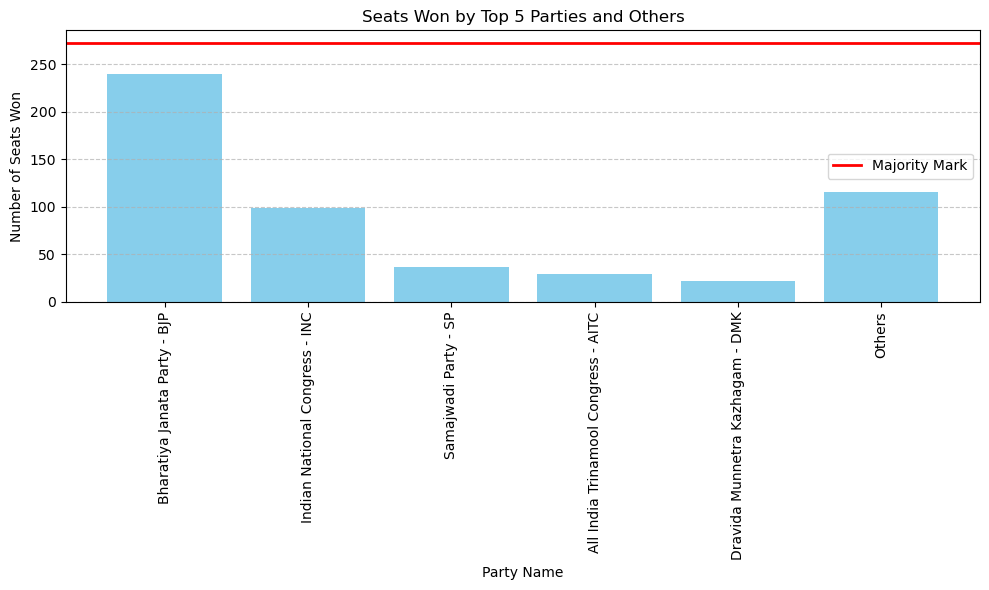

In [222]:
top_5_bargraph = cleaned_data.nlargest(5, 'Won')
other_seats = cleaned_data['Won'].sum() - top_5_bargraph['Won'].sum()

bargraph_data = top_5_bargraph.append({'Party': 'Others', 'Won': other_seats}, ignore_index=True)

plt.figure(figsize=(10, 6))
plt.bar(bargraph_data['Party'], bargraph_data['Won'], color='skyblue')
plt.axhline(y=majority_mark, color='r', linewidth=2, label='Majority Mark')
plt.xlabel('Party Name')
plt.ylabel('Number of Seats Won')
plt.title('Seats Won by Top 5 Parties and Others')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7,label='majority_mark')
plt.legend()
plt.tight_layout()



plt.show()

# pie chart

In [226]:
# we will see percentage of seats won by every party

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18124\3918758327.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = top_5.append({'Party': 'Others', 'Won': others}, ignore_index=True)


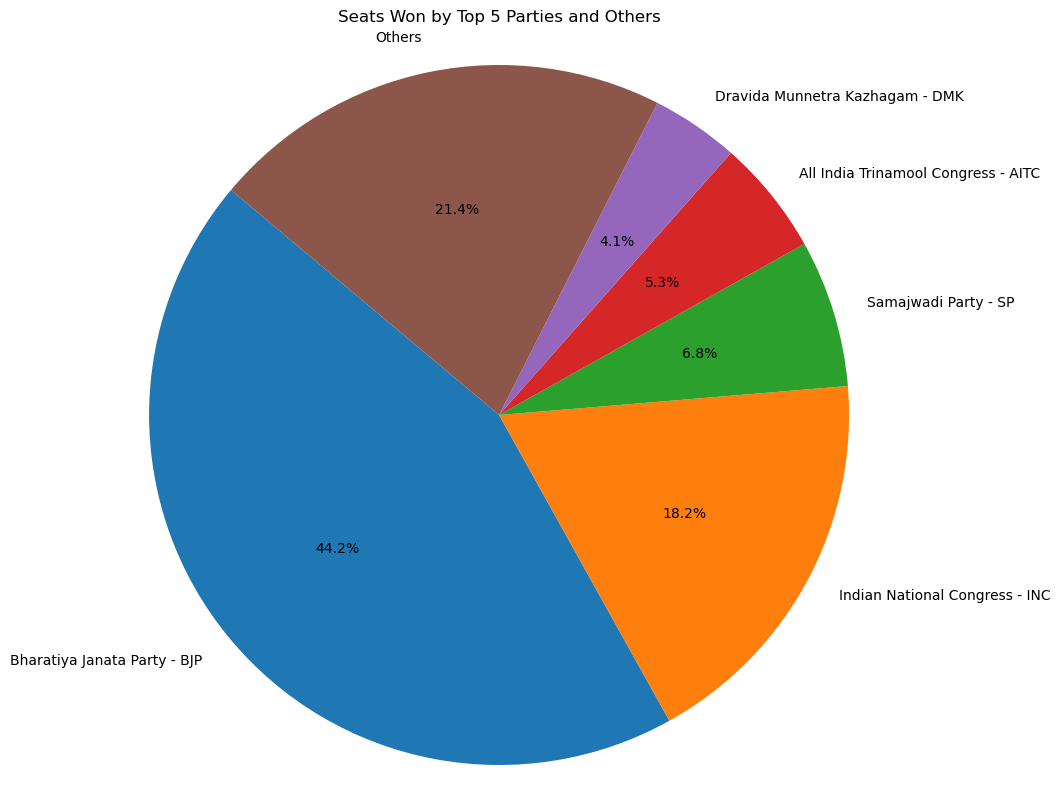

In [223]:
top_5 = cleaned_data.nlargest(5, 'Won')


others = cleaned_data['Won'].sum() - top_5['Won'].sum()


combined_data = top_5.append({'Party': 'Others', 'Won': others}, ignore_index=True)


plt.figure(figsize=(12, 10))
plt.pie(combined_data['Won'], labels=combined_data['Party'], autopct='%1.1f%%', startangle=140)
plt.title('Seats Won by Top 5 Parties and Others')
plt.axis('equal') 
plt.show()


# HEATMAP

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18124\2225975593.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = top5.append({'Party': 'Others', 'Won': others_share}, ignore_index=True)


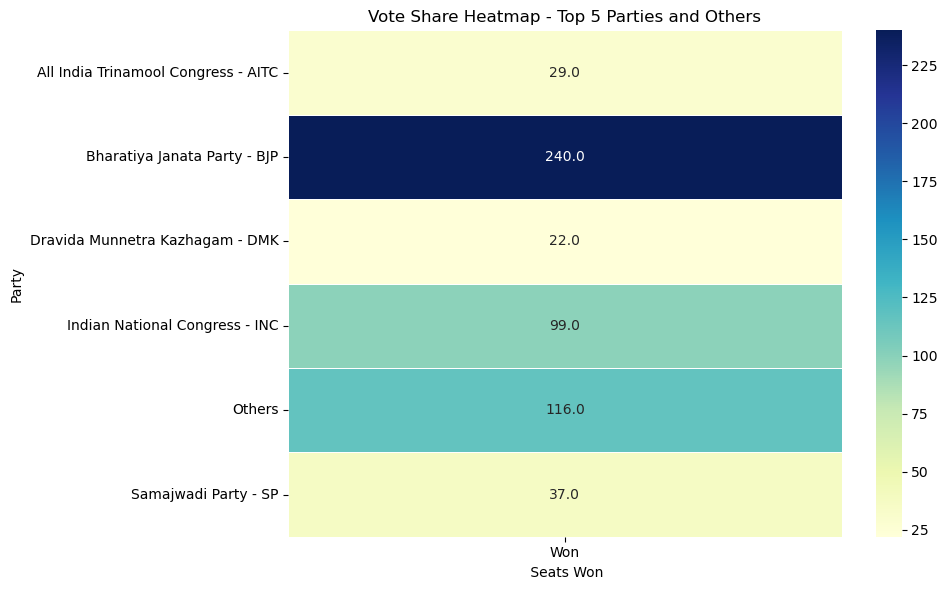

In [225]:
top5 = cleaned_data.head(5)

others_share = cleaned_data.iloc[5:]['Won'].sum()


plot_data = top5.append({'Party': 'Others', 'Won': others_share}, ignore_index=True)

heatmap_data = plot_data.pivot_table(index='Party', values='Won')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Vote Share Heatmap - Top 5 Parties and Others')
plt.xlabel(' Seats Won')
plt.ylabel('Party')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## THESE ARE THE KEY INSIGHTS FROM THE DATA 